In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import *

In [3]:
# load image
img_path = load_obj("../../data/data_augmentation/filters/images_filters_for_obj/ASINH/", 'jpg')


In [4]:
img_path

['../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_12_acs_wfc_f814w_j90o12_drc_13.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_12_acs_wfc_f814w_j90o12_drc_20.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_12_acs_wfc_f814w_j90o12_drc_8.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_12_acs_wfc_f814w_j90o12_drc_9.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_28_acs_wfc_f814w_j90o28_drc_14.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_28_acs_wfc_f814w_j90o28_drc_20.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_10190_28_acs_wfc_f814w_j90o28_drc_25.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_14610_02_acs_wfc_f814w_jdb602_drc_10.jpg',
 '../../data/data_augmentation/filters/images_filters_for_obj/ASINH\\hst_1

In [5]:
filt_path = load_obj("../../data/data_augmentation/filters/images_filters_for_obj/*", '-')
filt_path

['../../data/data_augmentation/filters/images_filters_for_obj\\ASINH',
 '../../data/data_augmentation/filters/images_filters_for_obj\\Linear',
 '../../data/data_augmentation/filters/images_filters_for_obj\\Log',
 '../../data/data_augmentation/filters/images_filters_for_obj\\Power',
 '../../data/data_augmentation/filters/images_filters_for_obj\\SINH',
 '../../data/data_augmentation/filters/images_filters_for_obj\\Sqrt',
 '../../data/data_augmentation/filters/images_filters_for_obj\\Squarded']

In [6]:
sample_img = load_obj('../../data/data_augmentation/filters/images_filters_for_obj/ASINH/', 'jpg')
sample_label = load_obj('../../data/data_augmentation/filters/coordinate_filters/ASINH/', 'txt')
sample_label_yolo = load_obj('../../data/data_augmentation/filters/labels_filters/ASINH/', 'txt')

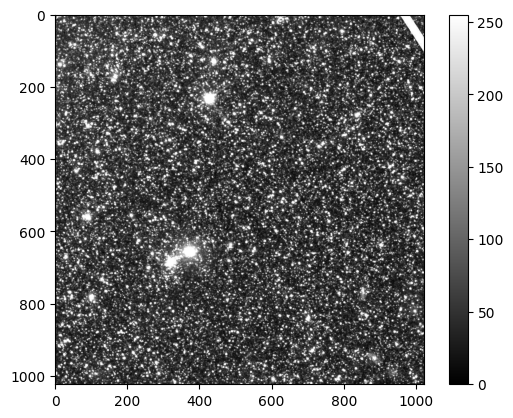

In [7]:
show_img(cv2.imread(sample_img[12], 0))

In [8]:
# display text in sample_label[0]
with open(sample_label[12], 'r') as f:
    print(f.read())


Cluster 312.9753999999998 687.5899 100.0 100.0 212.9753999999998 412.9753999999998 587.5899 787.5899



In [9]:
sample_label[0].split('\\')[-1].split('.')[0]


'hst_10190_12_acs_wfc_f814w_j90o12_drc_13'

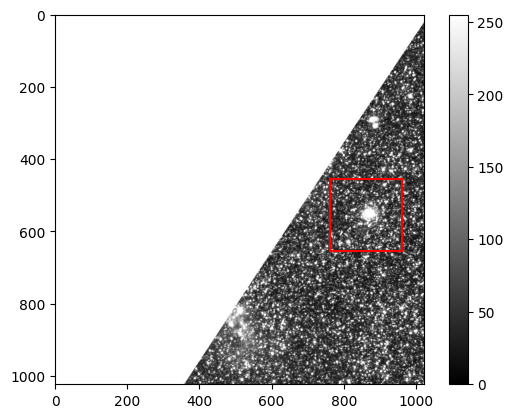

In [10]:
show_img(plot_rectangle(sample_img[0], sample_label_yolo[0], format='yolo'))

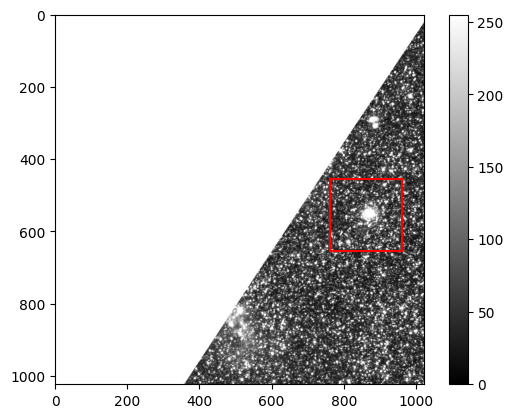

In [11]:
show_img(plot_rectangle(sample_img[0], sample_label[0]))

# Tranform

In [12]:
def plot_rectangle_withIMG(img, list_position):
    import cv2
    import matplotlib.pyplot as plt
    from PIL import Image
    # print(list_position)
    try : # for x,y coordinate
        for position in list_position:
            x_min = position[0]
            x_max = position[1]
            y_min = position[2]
            y_max = position[3]
            plt.plot([x_min, x_max], [y_min, y_min], c='r')
            plt.plot([x_min, x_max], [y_max, y_max], c='r')
            plt.plot([x_min, x_min], [y_min, y_max], c='r')
            plt.plot([x_max, x_max], [y_min, y_max], c='r')
    except: # for yolo coordinate
        for line in list_position:
            x_center = float(line[0])
            y_center = float(line[1])
            width = float(line[2])
            height = float(line[3])
            x_min = int((x_center - width/2) * img_w)
            x_max = int((x_center + width/2) * img_w)
            y_min = int((y_center - height/2) * img_h)
            y_max = int((y_center + height/2) * img_h)
            plt.plot([x_min, x_max], [y_min, y_min], c='r')
            plt.plot([x_min, x_max], [y_max, y_max], c='r')
            plt.plot([x_min, x_min], [y_min, y_max], c='r')
            plt.plot([x_max, x_max], [y_min, y_max], c='r')

def tup_to_list(tup):
    return list(map(list, tup))

In [13]:
# augmentation image by albumentations
import albumentations as A
from albumentations.pytorch import ToTensorV2
from PIL import Image

# transform images
transform = A.Compose([ 
A.HorizontalFlip(p=0.5)], 
bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

c:\Users\news1\miniconda3\envs\narit\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
im_ = cv2.imread(sample_img[0], 0)

In [15]:
bboxes = np.loadtxt(sample_label_yolo[0])
bboxes = bboxes.reshape(-1, 5)
bboxes = bboxes.tolist()
# select on coordinate
bboxes = [[i[1], i[2], i[3], i[4]] for i in bboxes]
# select only label
class_labels = [0 for i in range(len(bboxes))]

In [16]:
bboxes, class_labels

([[0.8412, 0.5414, 0.1953, 0.1953]], [0])

In [17]:
transformed = transform(image=im_, bboxes=bboxes, class_labels=class_labels) 

transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']
transformed_class_labels = transformed['class_labels']


In [18]:
print(transformed_image, transformed_bboxes, transformed_class_labels)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [249 255 246 ... 255 255 255]
 [179 240 255 ... 255 255 255]
 [103 173 219 ... 255 255 255]] [(0.15880000000000005, 0.5414, 0.19530000000000003, 0.19530000000000003)] [0]


In [19]:
# show dimention of transformed_image
transformed_image.shape

(1024, 1024)

In [20]:
# change tuple to list
transformed_bboxes = tup_to_list(transformed_bboxes)
transformed_bboxes

[[0.15880000000000005, 0.5414, 0.19530000000000003, 0.19530000000000003]]

In [21]:
# convert np array to image
img_2 = Image.fromarray(transformed_image)


In [22]:
img_2.size

(1024, 1024)

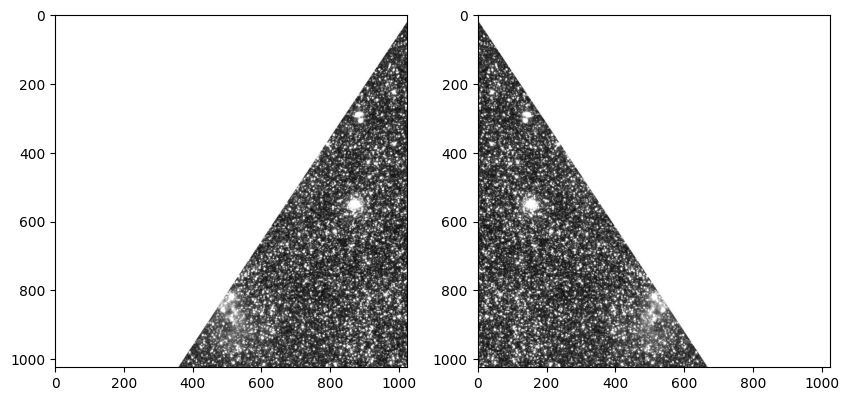

In [23]:
# show img with before augmentation and after augmentation
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(cv2.imread(sample_img[0], 0), cmap='gray')
ax[1].imshow(img_2, cmap='gray')
plot_rectangle_withIMG(ax[0], bboxes)
plot_rectangle_withIMG(ax[1], transformed_bboxes)


In [24]:
transformed_bboxes

[[0.15880000000000005, 0.5414, 0.19530000000000003, 0.19530000000000003]]

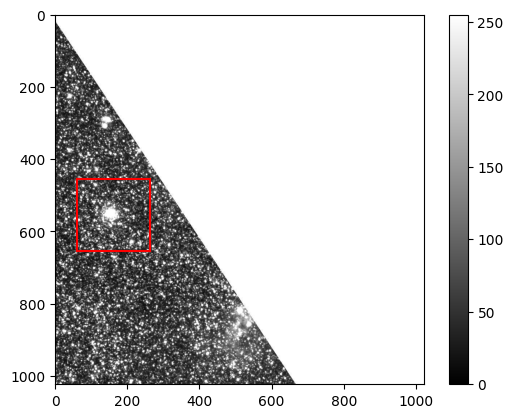

In [25]:
# plot rectangle in transformed image
show_img(plot_rectangle(img_2, transformed_bboxes, format='yolo'))

In [26]:
print(transformed_bboxes, transformed_class_labels)

[[0.15880000000000005, 0.5414, 0.19530000000000003, 0.19530000000000003]] [0]


In [27]:
# augmentation
def augmentation(img_path, label_path, aug_mode): # label is path of label
    # transform images
    if aug_mode == 'horizontal_flip':
        transform = A.Compose([
        A.HorizontalFlip(p=0.5)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'vertical_flip':
        transform = A.Compose([
        A.VerticalFlip(p=0.5)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_rotate':
        transform = A.Compose([
        A.Rotate(limit=45, p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_brightness':
        transform = A.Compose([
        A.RandomBrightnessContrast(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_gamma':
        transform = A.Compose([
        A.RandomGamma(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_hue':
        transform = A.Compose([
        A.RandomHueSaturation(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_blur':
        transform = A.Compose([
        A.Blur(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_motion_blur':
        transform = A.Compose([
        A.MotionBlur(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_median_blur':
        transform = A.Compose([
        A.MedianBlur(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_gauss_noise':
        transform = A.Compose([
        A.GaussNoise(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))
    elif aug_mode == 'random_invert_img':
        transform = A.Compose([
        A.InvertImg(p=1)],
        bbox_params=A.BboxParams(format='yolo', label_fields=['class_labels']))

    # transform images
    transformed_image = []
    transformed_bboxes = []
    transformed_class_labels = []
    for i in range(len(img_path)):
        im_ = cv2.imread(img_path[i], 0)
        bboxes = np.loadtxt(label_path[i])
        bboxes = bboxes.reshape(-1, 5)
        bboxes = bboxes.tolist()
        # select on coordinate
        bboxes = [[i[1], i[2], i[3], i[4]] for i in bboxes]
        # select only label
        class_labels = [0 for i in range(len(bboxes))]
        transformed = transform(image=im_, bboxes=bboxes, class_labels=class_labels)
        transformed_image.append(transformed['image'])
        transformed_bboxes.append( tup_to_list(transformed['bboxes']) ) # change tuple to list
        transformed_class_labels.append(transformed['class_labels'])

    return transformed_image, transformed_bboxes, transformed_class_labels

In [28]:
# test def augmentation
transformed_image, transformed_bboxes, transformed_class_labels = augmentation(sample_img, sample_label_yolo, 'horizontal_flip')
print(transformed_image[0].shape, transformed_bboxes[0], transformed_class_labels[0])

(1024, 1024) [[0.8412, 0.5414, 0.19530000000000003, 0.19530000000000003]] [0]


In [29]:
bboxes

[[0.8412, 0.5414, 0.1953, 0.1953]]

In [30]:
# np.loadtxt(sample_label_yolo[2])
new_bboxes = []
for i in sample_label_yolo:
    # read label
    bboxes = np.loadtxt(i)
    new_bboxes.append(bboxes)

# convert np array to list

new_bboxes = [i.tolist() for i in new_bboxes]
new_bboxes
#select only pos 1 2 3 4 each label
# new_bboxes = [[i[1], i[2], i[3], i[4]] for i in new_bboxes]
# new_bboxes


[[0.0, 0.8412, 0.5414, 0.1953, 0.1953],
 [0.0, 0.1793, 0.2991, 0.1953, 0.1953],
 [0.0, 0.6506, 0.6916, 0.1953, 0.1953],
 [[0.0, 0.7704, 0.1153, 0.1953, 0.1953],
  [0.0, 0.2155, 0.1602, 0.1953, 0.1953]],
 [0.0, 0.4799, 0.2016, 0.1953, 0.1953],
 [[0.0, 0.7482, 0.1354, 0.1953, 0.1953],
  [0.0, 0.4632, 0.8873, 0.1953, 0.1953]],
 [0.0, 0.4632, 0.4166, 0.1953, 0.1953],
 [[0.0, 0.6592, 0.6324, 0.1953, 0.1953],
  [0.0, 0.2843, 0.1734, 0.1953, 0.1953]],
 [0.0, 0.8665, 0.7343, 0.1953, 0.1953],
 [0.0, 0.3483, 0.5992, 0.1953, 0.1953],
 [0.0, 0.8014, 0.4139, 0.1953, 0.1953],
 [[0.0, 0.8805, 0.734, 0.1953, 0.1953], [0.0, 0.649, 0.2419, 0.1953, 0.1953]],
 [0.0, 0.3056, 0.6715, 0.1953, 0.1953],
 [0.0, 0.4857, 0.0993, 0.1953, 0.1953],
 [0.0, 0.8012, 0.1714, 0.1953, 0.1953],
 [0.0, 0.8012, 0.2808, 0.1953, 0.1953],
 [0.0, 0.7166, 0.8907, 0.1953, 0.1953],
 [0.0, 0.1359, 0.5001, 0.1953, 0.1953],
 [0.0, 0.6032, 0.4474, 0.1953, 0.1953],
 [0.0, 0.1128, 0.6449, 0.1953, 0.1953],
 [0.0, 0.2529, 0.4572, 0.1953, 0